# CC5 d'Alain QUARTIER-LA-TENTE

# ER graphs
1-Generate 10 replicas of ER graphs with N=1000 nodes and connection probabilities p=[0.00005, 0.0001, 0.0002, 0.001, 0.002,0.005, 0.01,0.015, 0.02]
2- show visually and with a linear fit that $\langle k\rangle=Np$
3- Are the networks connected? Which is the size of the giant component?  Plot size of the giant component as a function of p. What do you observe?

In [102]:
import networkx as nx
import random

import matplotlib.pyplot as plt

import itertools

import numpy as np
import math
import random

random.seed(202101)
np.random.seed(202101)

## Question 1 - Génération des graphes

In [103]:
N=1000
nRepl=10
pList=[0.00005, 0.0001, 0.0002, 0.001, 0.002,0.005, 0.01,0.015, 0.02]

In [104]:
# the list of graphs is now a dictionary: I will have a list for each value of the parameter p
listGraphs={}

#loop on the values for the parameter p
for p in pList:
    print (p) #to be sure that I'm not too slow
    listGraphs[p]=[]
    #loop on the replicas
    for i in range(nRepl):
        G=nx.erdos_renyi_graph(N,p)
        listGraphs[p].append(G)

5e-05
0.0001
0.0002
0.001
0.002
0.005
0.01
0.015
0.02


## Question 2 - show visually and with a linear fit that $\langle k\rangle=Np$

On a vu dans le cours, que la relation entre le degré moyen $\langle k\rangle$ et $p$ était bien linéaire mais plutôt sous la forme $\langle k\rangle=(N-1)p$

In [105]:
avK=[np.mean([np.mean([G.degree(u) for u in G.nodes()]) for G in listGraphs[p]]) for p in pList]

On fait d'abord une régression linéaire avec constante

In [106]:
coef = np.polyfit(pList,avK, 1)
poly1d_fn = np.poly1d(coef)
lin_fit = "<k> = {} p + {}".format(round(coef[0],2),
                             round(coef[1],2))
lin_fit

'<k> = 1000.5 p + 0.0'

Il serait peut-être plus pertinent de faire une régression linéaire sans constante : pour $p=0$ le degré moyen est nul. La valeur de la constante était presque nulle, cela ne change quasiment pas les résultats d'enlever la constante.

In [107]:
from scipy.optimize import curve_fit
def f(x, a):
    return a * x

# parameters and parameter covariances
popt, pcov = curve_fit(f, pList, avK)
popt
lin_fit_without_c = "<k> = {} p".format(round(popt[0],2))
poly1d_fn = np.poly1d([popt[0],0]) 
lin_fit_without_c

'<k> = 1000.65 p'

On ne retrouve pas exactement la relation $<k>=(N-1)p$ mais quelque chose d'assez proche par la régression linéaire sans constante, cela vient sûrement du fait que l'on fait une régression linéaire avec 7 observations, et donc qu'il y a beaucoup de variance dans les estimations. Par ailleurs, du fait de l'aléatoire, en relançant les programmes on trouve des résultats différents

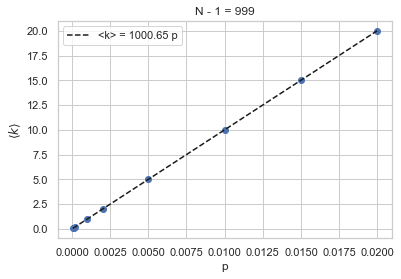

In [108]:
plt.plot(pList,avK,'o')
plt.plot(pList, poly1d_fn(pList), '--k',label = lin_fit_without_c)

plt.xlabel('p')
plt.ylabel(r'$\langle k\rangle$')
plt.legend()
plt.title("N - 1 = {}".format(N-1))
plt.show()

## Question 3 - Are the networks connected? Which is the size of the giant component?  Plot size of the giant component as a function of p. What do you observe?  
Pour chaque valeur de $p$ on regarde la taille moyenne de la composante maximale.   
https://stackoverflow.com/questions/26105764/how-do-i-get-the-giant-component-of-a-networkx-graph

On regardant la connectivité on note que pour des petites probabilités ($p<0.01$) les graphs ne sont pas connectés mais ils le sont dès lors que $p\geq 0.01$. Dès lors que les graphs sont connectés, on va trouver que la taille de la *giant component* est de 1000 (il n'y a qu'une seule composante).

In [109]:
{k:[nx.is_connected(g) for g in listGraphs[k]] for k in listGraphs.keys()}

{5e-05: [False, False, False, False, False, False, False, False, False, False],
 0.0001: [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 0.0002: [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False],
 0.001: [False, False, False, False, False, False, False, False, False, False],
 0.002: [False, False, False, False, False, False, False, False, False, False],
 0.005: [False, False, False, False, False, False, False, False, False, False],
 0.01: [True, True, True, True, True, True, True, True, True, True],
 0.015: [True, True, True, True, True, True, True, True, True, True],
 0.02: [True, True, True, True, True, True, True, True, True, True]}

In [110]:
def giant_comp(G):
    return G.subgraph(max(nx.connected_components(G), key=len))

In [111]:
avG=[np.mean([len(giant_comp(G)) for G in listGraphs[p]]) for p in pList]

In [112]:
print(pList,"\n",avG)

[5e-05, 0.0001, 0.0002, 0.001, 0.002, 0.005, 0.01, 0.015, 0.02] 
 [2.7, 3.6, 4.6, 100.1, 790.0, 992.9, 1000.0, 1000.0, 1000.0]


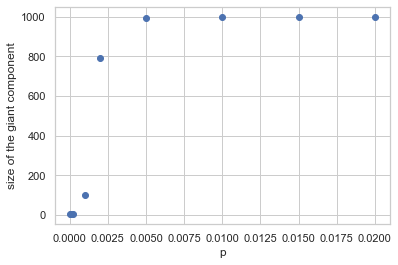

In [113]:
plt.plot(pList,avG,'o')
plt.xlabel('p')
plt.ylabel("size of the giant component")
plt.show()

On observe en fait 3 phases différentes, qu'on retrouve dans la littérature (voir par exemple [ici](https://www.ndsu.edu/pubweb/~novozhil/Teaching/767%20Data/36_pdfsam_notes.pdf)) :
- $p<\frac{1}{N}=0.001$, évolution très lente, logarithmique

- $\frac{1}{N}=0.001\leq p< \frac{\log(N)}{N}\simeq 0.007$ un saut puis augmentation très rapide

- $p> \frac{\log(N)}{N}\simeq 0.007$ taille égale à $N$

# COMPARISON WITH REAL NETWORKS

1- Take the twitch networks from last lesson. Calculate their average clustering coefficient. Calculate the average clustering coefficient for several replicas of a random graph with the same number of nodes and the same number of edges (using p=2E/N(N-1) ) of the twich networks. Compare the real values and the random values. What do you observe? How can you interpret this?

OPTIONAL: perform a significance test to see if the value observed in real networks is equal to the value observed in the random case. 

2- OPTIONAL: A better way to randomize network structures consists in rewiring the links preserving the degree structure:

(1) take two links (n1,n2) and (n3,n4). 

(2)exchange one of the extremes in order to have (n1,n4) and (n3,n2)

(3) Iterate this procedure for a number of times proportional to the number of edges

Write the script performing this procedure and apply this to one of the Twitch networks. 

In [1]:
import networkx as nx
import random

import matplotlib.pyplot as plt

import itertools

import numpy as np
import math

import random
random.seed(202102)
np.random.seed(202102)

On se restreint à l'étude du réseau Twitch français

In [2]:
infile='data/musae_FR_edges.csv'
FR=nx.read_edgelist(infile, delimiter=',')
avr_clustering_fr = nx.average_clustering(FR)
print("Average clustering coefficient = {}".format(round(avr_clustering_fr,4)))

Average clustering coefficient = 0.2217


In [6]:
E = len(FR.edges())
N = len(FR.nodes())
p = 2*E/(N*(N-1))
print("Il y a {} noeuds et {} arêtes".format(N,E))

Il y a 6549 noeuds et 112666 arêtes


On va générer aléatoirement `nRepl=50` Erdos-Renyi graphes avec autant de noeuds que dans le réseau initial et avec en moyenne le même nombre de lien (en utilisant $p=\frac{2\langle E\rangle}{N(N-1)}$).

In [28]:
nRepl=50
listGraphs=[]

for i in range(nRepl):
    if i % 5 == 0:
        print(i)
    G=nx.erdos_renyi_graph(N,p)
    listGraphs.append(G)

0
5
10
15
20
25
30
35
40
45


In [30]:
avr_clustering = [nx.average_clustering(G) for G in listGraphs]

On trouve que le clustering moyen est très faible par rapport au clustering trouvé dans la base twitch.
On retrouve ce que l'on a vu en cours :
$$
\langle c\rangle = p \left(=\frac{2\langle E\rangle}{N(N-1)}\text{ dans notre cas}\right)
$$
le clustering moyen est égal à la probabilité $p$ utilisée dans la génération du graphe : il tend vers 0 quand $N$ est grand.

Clustering base twitch FR = 0.22170550923594232
Clustering moyen = 0.005271182221132933
p = 0.005254594540493715


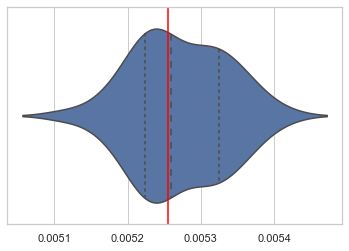

In [34]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=avr_clustering, inner="quartile")
plt.axvline(x=p, color = "red",label ="p")
#plt.axvline(x=avr_clustering_fr, color = "orange", label = "Base twitch")

print("Clustering base twitch FR = {}".format(avr_clustering_fr))
print("Clustering moyen =", np.mean(avr_clustering))
print("p =", p)

## [Optional] perform a significance test to see if the value observed in real networks is equal to the value observed in the random case.
On va vu en cours la relation suivante :
$$
\langle c\rangle = p =\frac{\langle k\rangle}{N}
$$
Et la probabilité qu'un noeud soit de degré $k$ suit une loi binomiale $\mathcal B(N-1,p)$. Notons $c_0$ la valeur du clustering coefficient trouvée dans le réseau twitch. On veut effectuer le test suivant :

$H_0$ : $p=c_0$ contre $H_1$ : $p\ne c_0$ 

Comme $N$ est grand, on utilise une approximation gaussienne. Notons $X\sim \mathcal B(N-1,p)$, on a :
$$
T=\frac{
\lvert X-(N-1)c_0 \rvert
}{\sqrt{
(N-1)c_0(1-c_0)
}}
\sim \mathcal N(0,1) \text{ sous }H_0
$$
On compare la réalisation de cette loi (en "remplaçant" $X$ par le clustering moyen trouvé dans notre génération des graphs) au quantile $1-\alpha/2$ d'une loi normale $\mathcal N(0,1)$. Le test d'égalité de la valeur observée dans le réseau réel à celle du cas aléatoire est rejeté au seuil de 10 % (idem si l'on fait un test unilatéral uniquement).

In [45]:
import math
import scipy.stats
T = abs(np.mean(avr_clustering) - (N-1)* avr_clustering_fr)/math.sqrt((N-1)* avr_clustering_fr*(1-avr_clustering_fr))
print("Statistique de test =",T)
print("Quantile 1-alpha/2 d'une loi normale N(0,1) pour alpha = 10% : ",T > scipy.stats.norm.ppf(0.95))
print("Test rejeté au seuil 10 % ?", T > scipy.stats.norm.ppf(0.95))

Statistique de test = 43.18858972855375
Quantile 1-alpha/2 d'une loi normale N(0,1) pour alpha = 10% :  True
Test rejeté au seuil 10 % ? True


## 2- OPTIONAL: A better way to randomize network structures consists in rewiring the links preserving the degree structure

(1) take two links (n1,n2) and (n3,n4). 

(2)exchange one of the extremes in order to have (n1,n4) and (n3,n2)

(3) Iterate this procedure for a number of times proportional to the number of edges

Write the script performing this procedure and apply this to one of the Twitch networks. 

In [3]:
random.seed(20210202)
np.random.seed(20210202)

In [11]:
def rewiring (G, nbIter):
    G = G.copy()
    for _ in range(round(nbIter)):
        selEdges=random.sample(G.edges(),2)
        G.remove_edges_from(selEdges)
        G.add_edge(selEdges[0][0], selEdges[1][1])
        G.add_edge(selEdges[1][0], selEdges[0][1])
    return G

Le programme suivant met plusieurs heures à tourner, ne pas le relancer

In [12]:
alphaIter=[0.5,1, 2]
listGraphs=[]

#loop on the values for the parameter p
for alpha in alphaIter:
    print (alpha)
    listGraphs.append(rewiring(FR, alpha*E))

0.5
1
2
4


KeyboardInterrupt: 

In [13]:
avr_clusteringp2 = [nx.average_clustering(G) for G in listGraphs]

Avec cette nouvelle méthode de génération de graph, le clustering coefficient est bien plus élevé que précédemment mais reste inférieur. Plus le nombre d'itérations est grand, plus on déforme les liens et donc plus on tend vers un graphe aléatoire et l'*average clustering coefficient* diminue.

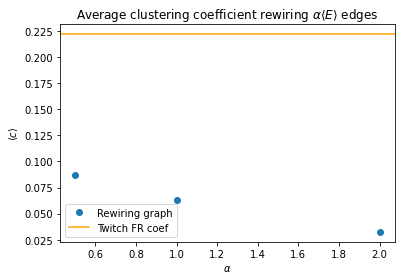

In [14]:
plt.plot([0.5,1, 2],avr_clusteringp2,'o', label = "Rewiring graph")
#plt.plot(pList, poly1d_fn(pList), '--k',label = lin_fit_without_c)
plt.axhline(y=avr_clustering_fr, color = "orange", label = "Twitch FR coef")
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\langle c\rangle$')
plt.legend()
plt.title("Average clustering coefficient rewiring "+r'$\alpha\langle E\rangle$' +" edges")
plt.show()